In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data Visualization

In [11]:
file2 = pd.read_csv(str(2)+ ".txt",sep='\s+', header=None)
file18 = pd.read_csv(str(18)+ ".txt",sep='\s+', header=None)

In [12]:
file2.shape,file18.shape

((20480, 3), (20480, 3))

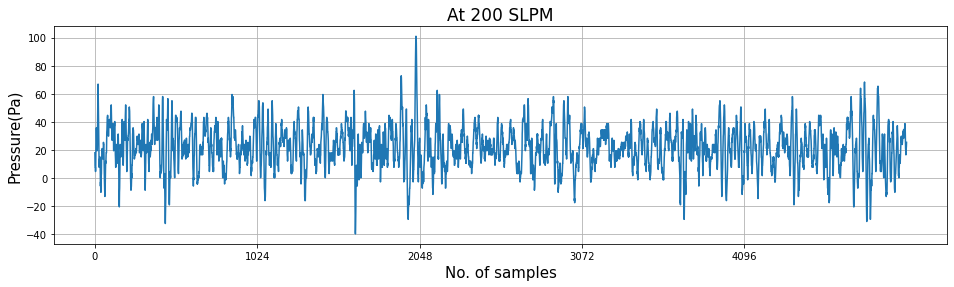

In [11]:

fig, ax = plt.subplots(figsize=(16,4))
ax.set_xticks(np.arange(0,5120,1024))

plt.plot(file2[1][0:5120]*(1000/0.215))
plt.xlabel('No. of samples',fontsize = 15)
plt.ylabel('Pressure(Pa)',fontsize = 15)
plt.title('At 200 SLPM',fontsize = 17)
plt.grid()

# plt.savefig("segmentation",dpi = 500)


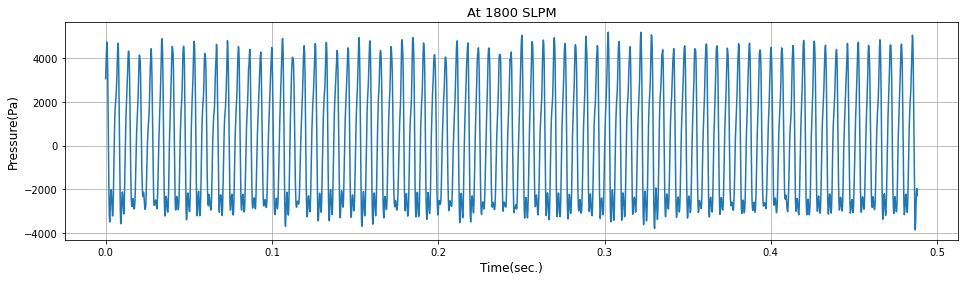

In [12]:

plt.figure(figsize = (16,4))

time = np.linspace(0,5,len(file2[1]))

plt.plot(time[0:2000],file18[1][0:2000]*(1000/0.215))
plt.xlabel('Time(sec.)',fontsize = 12)
plt.ylabel('Pressure(Pa)',fontsize = 12)
plt.title('At 1800 SLPM',fontsize = 13)
plt.grid()
# plt.savefig('1200slpm_plot',dpi=600)
plt.show()

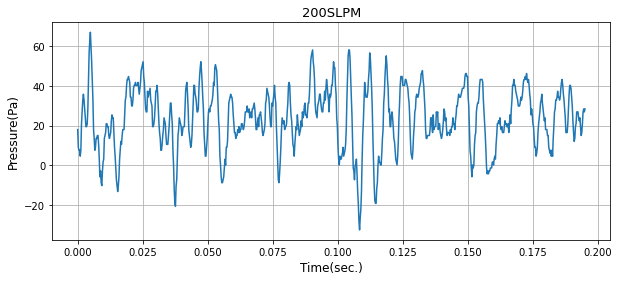

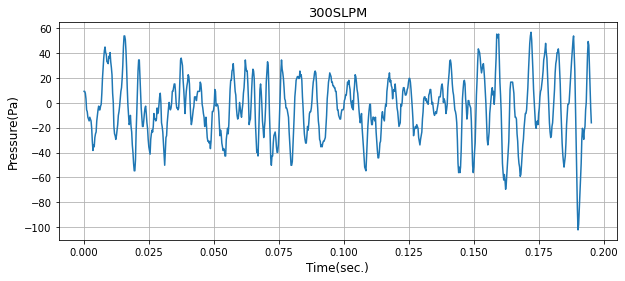

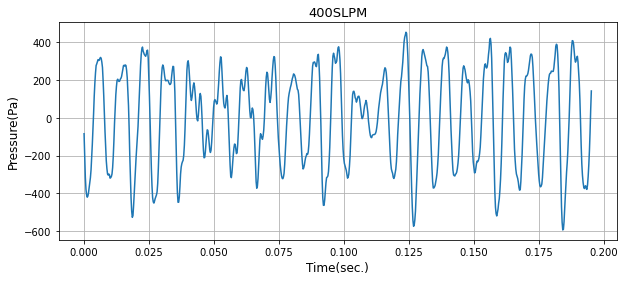

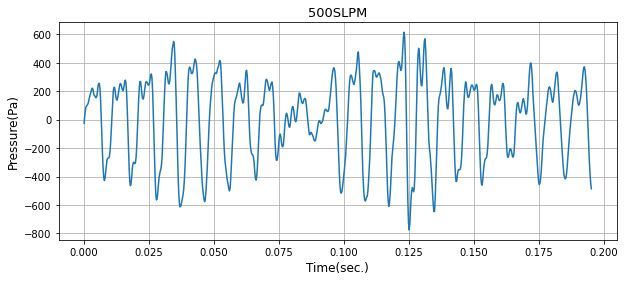

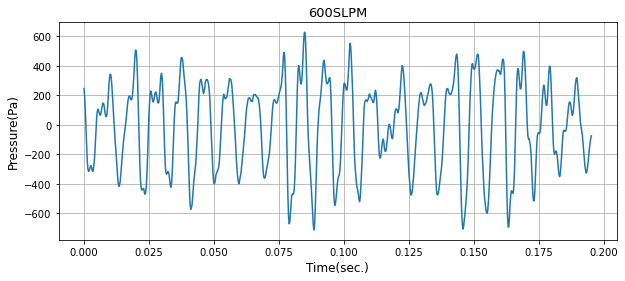

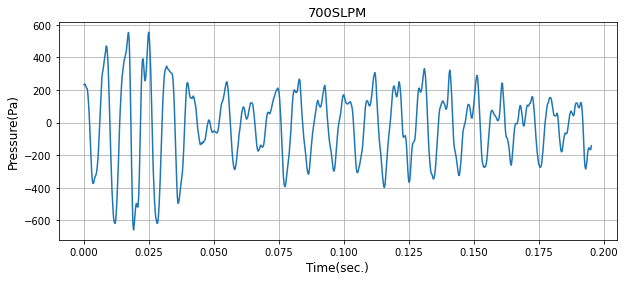

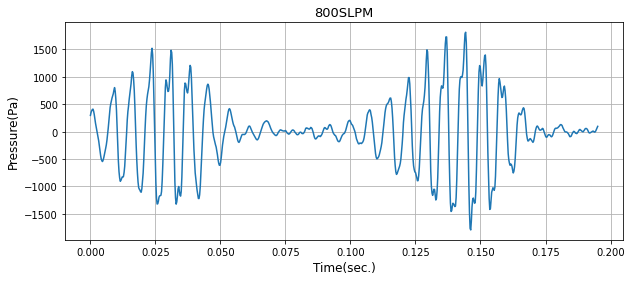

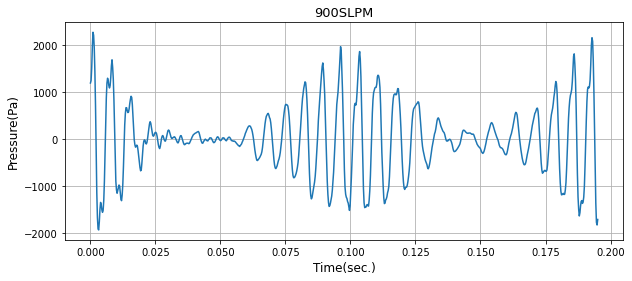

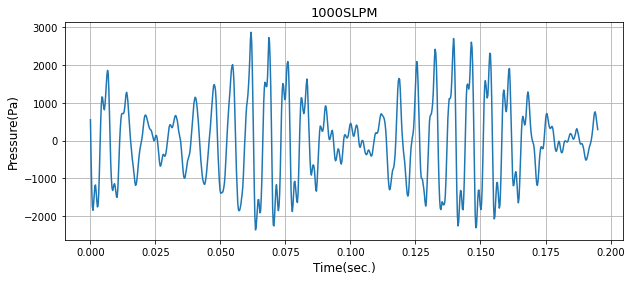

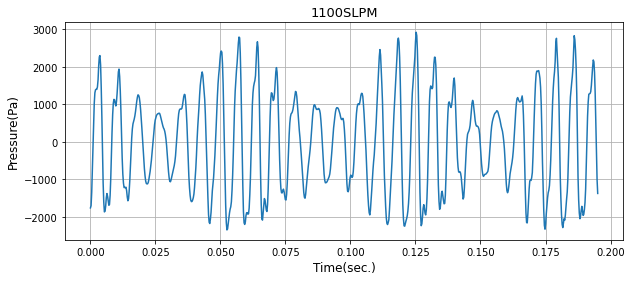

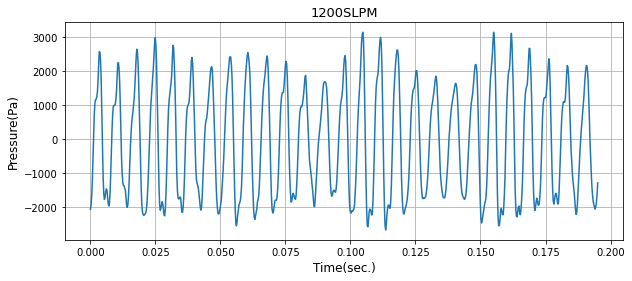

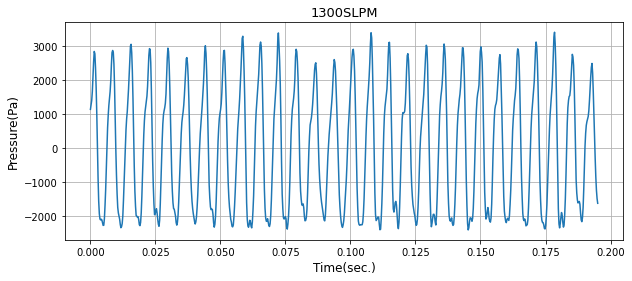

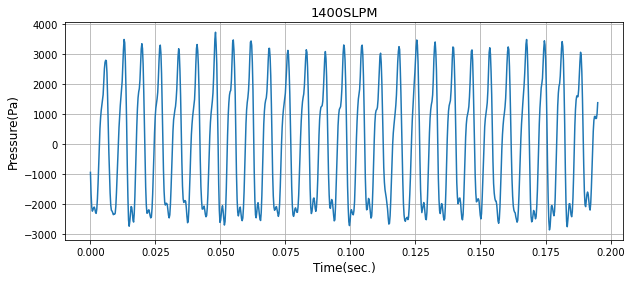

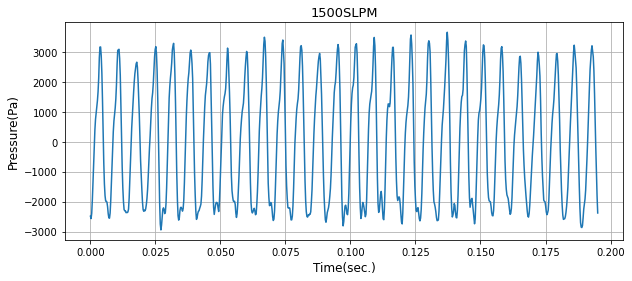

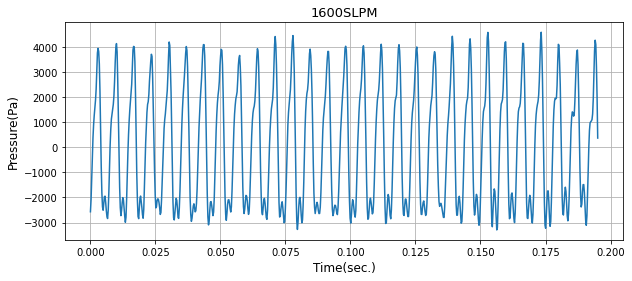

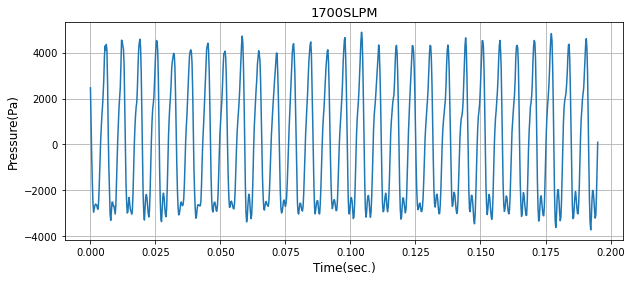

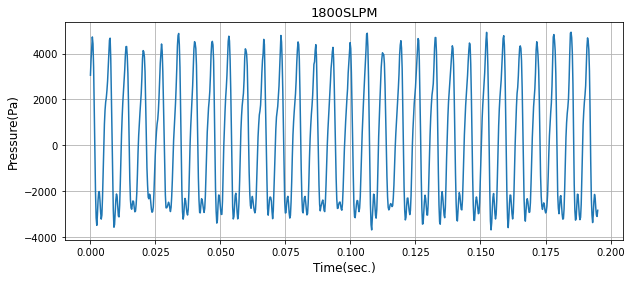

In [14]:

time = np.linspace(0,5,len(file2[1]))

for i in range(2, 19):
    plt.figure(figsize = (10,4))
    file = pd.read_csv(str(i)+ ".txt",sep='\s+', header=None)
    plt.plot(time[0:800],file[1][0:800]*(1000/0.215))
    plt.xlabel('Time(sec.)',fontsize = 12)
    plt.ylabel('Pressure(Pa)',fontsize = 12)
    plt.title(str(i*100) + 'SLPM',fontsize = 13)
    plt.grid()

plt.show()

## Compiling all the files

In [37]:
data_450 = []
data_650 = []
for i in range(2,18+1):
    file = pd.read_csv(str(i)+ ".txt",sep='\s+', header=None)
    for j in range(len(file)):
        td1 = file[1][j]
        td2 = file[2][j]
        td1 = td1*(1000/0.215)
        td2 = td2*(1000/0.215)
        data_450.append(td1)
        data_650.append(td2)

In [38]:
len(data_650)

348160

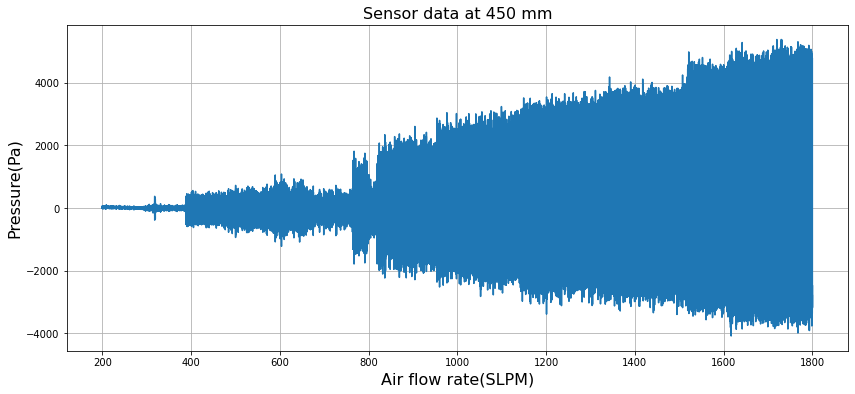

In [39]:
plt.figure(figsize = (14,6))
rate = np.linspace(200,1800,len(data_650))

plt.plot(rate,data_450)
plt.xlabel('Air flow rate(SLPM)',fontsize = 16)
plt.ylabel('Pressure(Pa)',fontsize = 16)
plt.title('Sensor data at 450 mm',fontsize = 16)

plt.grid()

plt.savefig('complied_plot',dpi=400)

plt.show()

In [8]:
CompiledData = pd.DataFrame(list(zip(data_450,data_650)))

NameError: name 'data_450' is not defined

In [26]:
CompiledData.shape

(348160, 2)

In [1]:
CompiledData.head()

NameError: name 'CompiledData' is not defined

In [43]:
CompiledData.to_csv('Compiled_data.csv')

array([   0, 1024, 2048, 3072, 4096])

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file2 = pd.read_csv(str(2)+ ".txt",sep='\s+', header=None)
file18 = pd.read_csv(str(18)+ ".txt",sep='\s+', header=None)

In [13]:
file2.head(5)

,0,1,2
0,3.564575e+09,0.003869,-0.006348
1,3.564575e+09,0.001957,-0.007612
2,3.564575e+09,0.001638,-0.008245
3,3.564575e+09,0.001638,-0.008245
4,3.564575e+09,0.001001,-0.008245


In [28]:
file2[1] = file2[1]*1000/.215
rms = file2[1].to_list()
rms_val = np.sqrt(np.mean([i**2 for i in rms]))
rms_val

20.745027865183605

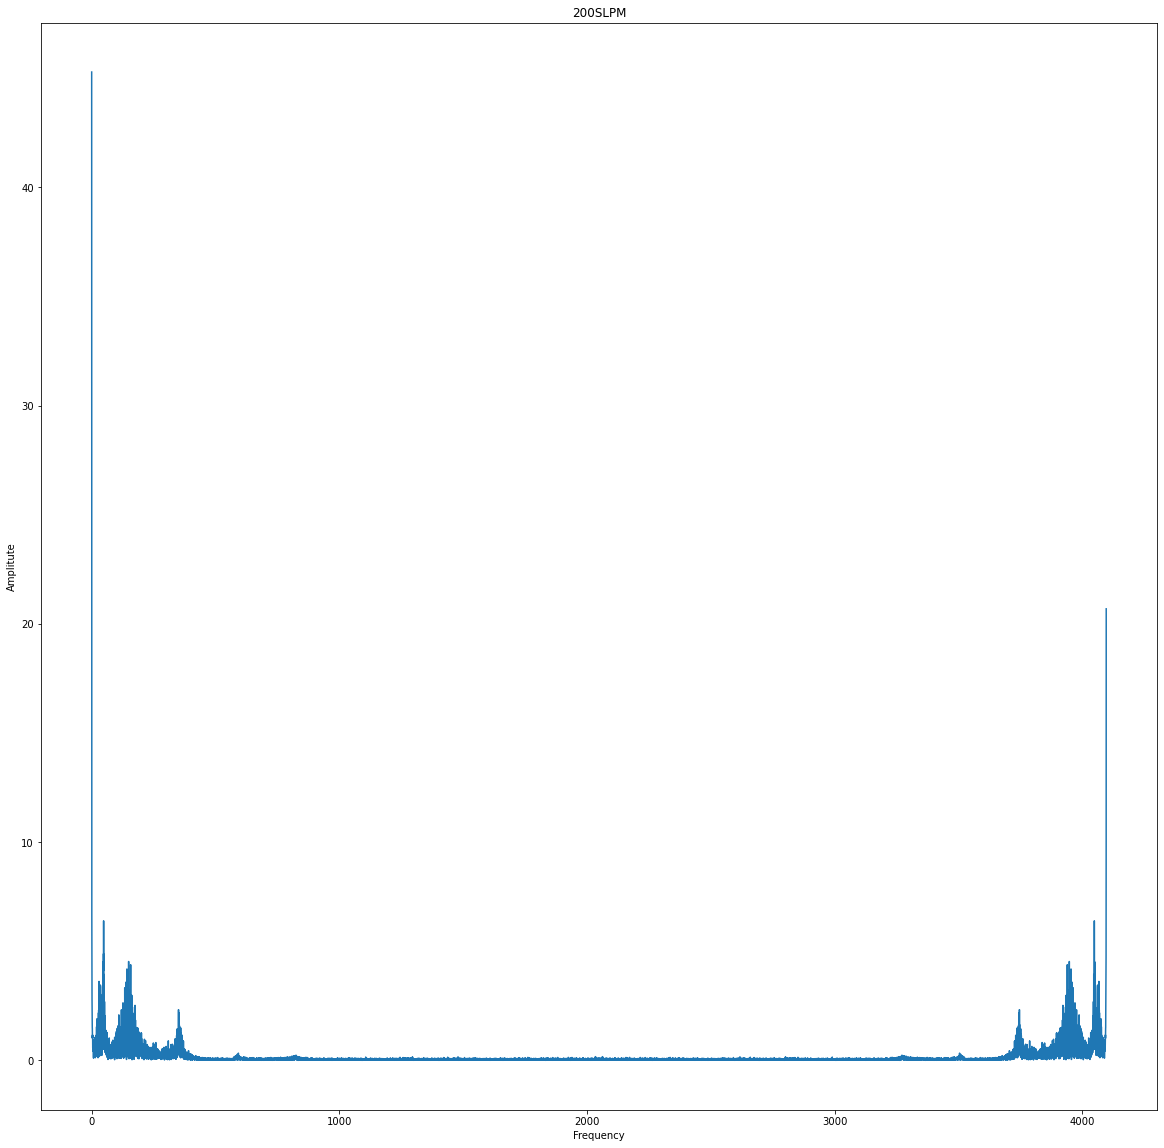

In [14]:
N = 20480 # Number of Samples
S_r = 4096 # Sampling Rate
T = 5 # 5 seconds
x_2 = list(file2[1]*(1000/0.215))
x_18 = list(file18[1]*(1000/0.215))
c_2 = np.fft.fft(x_2)
c_18 = np.fft.fft(x_18)
amp_2 = 4*np.abs(c_2) / N
amp_18 = 4*np.abs(c_18) / N
freq = np.array(range(0,N)) / T
plt.figure(figsize=(20,20))
plt.plot(freq , amp_2)
plt.title('200SLPM')
plt.xlabel('Frequency')
plt.ylabel('Amplitute')
plt.show()





In [18]:
# N = 20480 # Number of Samples
# S_r = 4096 # Sampling Rate
# T = 5 # 5 seconds
# x_2 = list(file2[1]*(1000/0.215))
# x_18 = list(file18[1]*(1000/0.215))
# c_2 = np.fft.fft(x_2)
# c_18 = np.fft.fft(x_18)
# amp_2 = 4*np.abs(c_2) / N
# amp_18 = 4*np.abs(c_18) / N
# freq = np.array(range(0,N)) / T
# plt.figure(figsize=(20,20))
# plt.plot(freq , amp_2)
# plt.title('200SLPM')
# plt.xlabel('Frequency')
# plt.ylabel('Amplitute')
# plt.show()
amp_18  = list(amp_18)
freq = list(freq)
csp = []
for i in range(len(amp_18[:10240])):
    num_sum = 0
    dem_sum = 0
    for j in range(i, i+512):
        num_sum += freq[j]*amp_18[j]
        dem_sum += amp_18[j]
    csp.append(num_sum/dem_sum/2048)

In [20]:
ssp = []
for i in range(len(amp_18[:10240])):
    num_sum = 0
    dem_sum = 0
    for j in range(i, i+512):
        num_sum += freq[j]-(csp[i]/2048)**2*amp_18[j]
        dem_sum += amp_18[j]
    ssp.append(np.sqrt(num_sum/dem_sum)/2048)
print(len(ssp))

10240


In [21]:
print(max(ssp))
print(min(ssp))

0.024755848489271044
0.000610576927216517


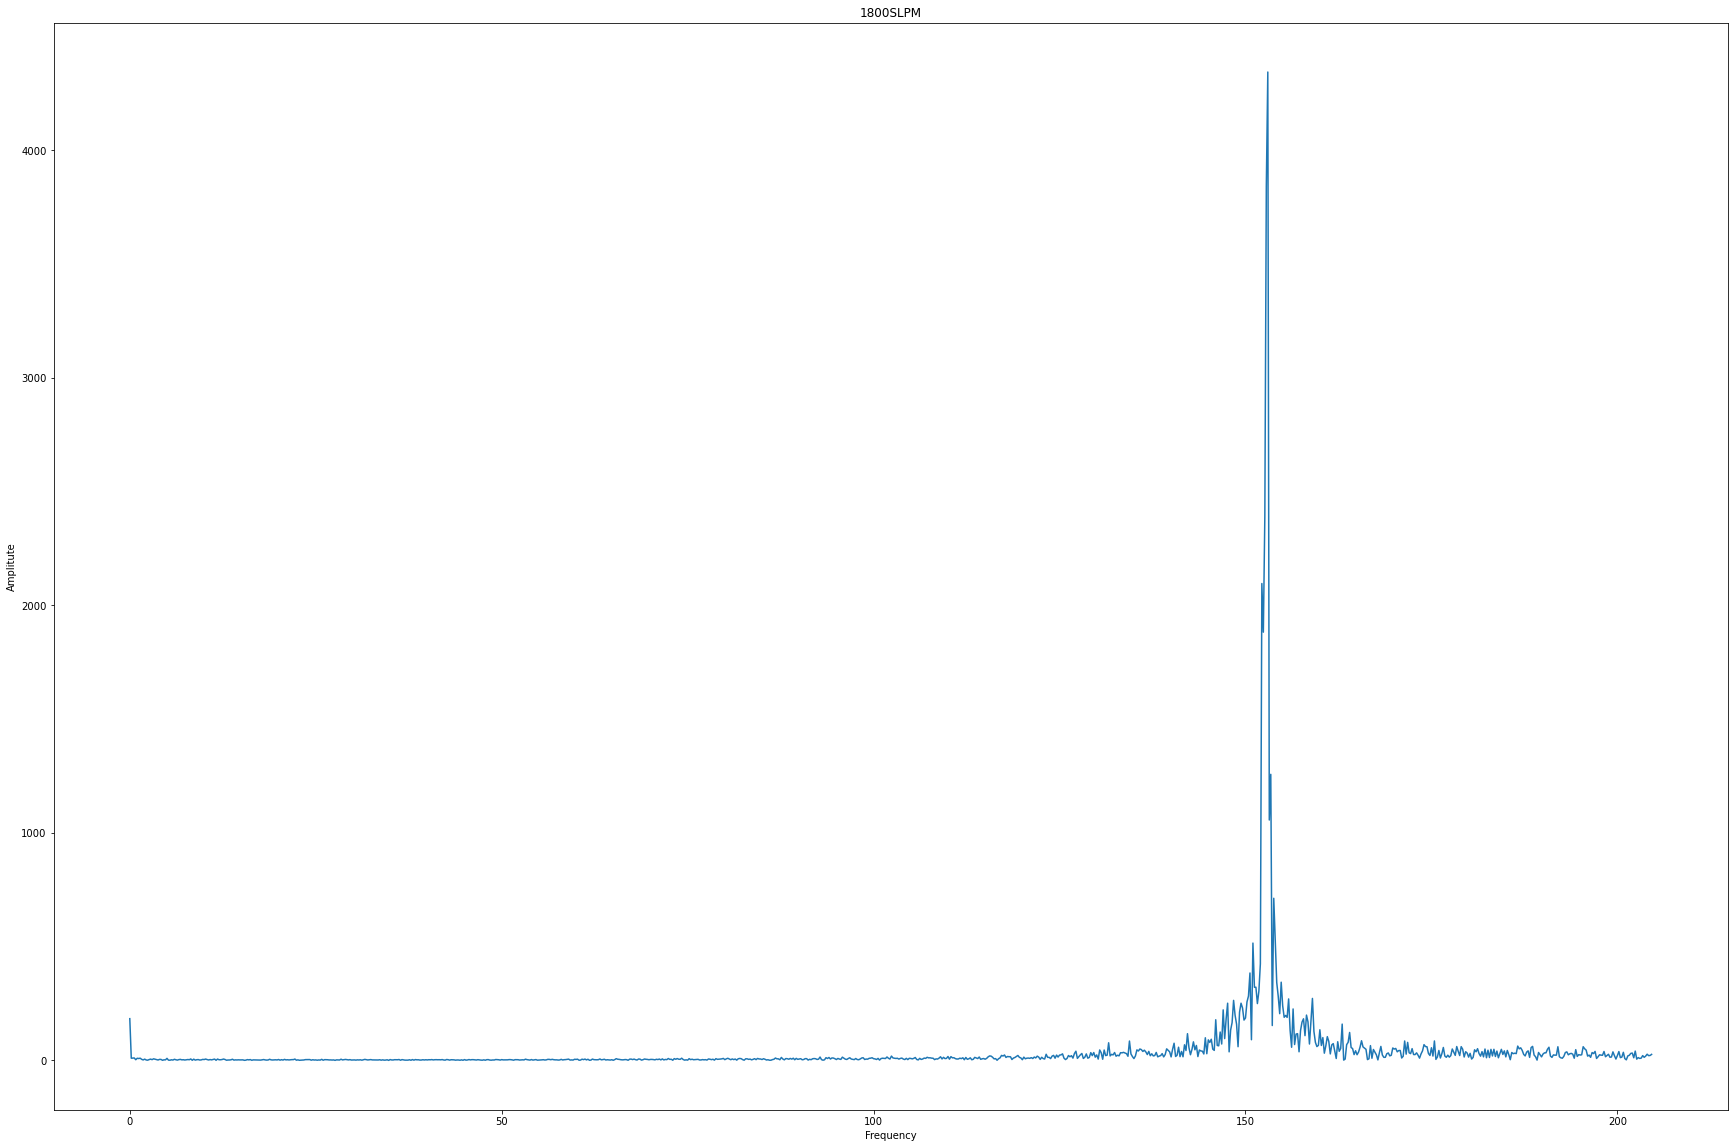

In [34]:
plt.figure(figsize=(30,20))

plt.plot(freq[:1024] , amp_18[:1024])
plt.title('1800SLPM')
plt.xlabel('Frequency')
plt.ylabel('Amplitute')
plt.show()

In [30]:
amp_2  = list(amp_2)
freq = list(freq)
csp = []
for i in range(len(amp_2[:10240])):
    num_sum = 0
    dem_sum = 0
    for j in range(i, i+512):
        num_sum += freq[j]*amp_2[j]
        dem_sum += amp_2[j]
    csp.append(num_sum/dem_sum/2048)

ssp = []
for i in range(len(amp_2[:10240])):
    num_sum = 0
    dem_sum = 0
    for j in range(i, i+512):
        num_sum += freq[j]-(csp[i]/2048)**2*amp_2[j]
        dem_sum += amp_2[j]
    ssp.append(np.sqrt(num_sum/dem_sum)/2048)
print(len(ssp))


print(max(ssp))
print(min(ssp))


10240
0.10860197240273414
0.0033576278430352442


In [ ]:
ssp1 = [:]